<a href="https://colab.research.google.com/github/kipsangchepesa/Time-series/blob/main/Copy_of_How_does_land_surface_cover_affect_surface_temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Defining the question.

How does land surface cover affect surface temperature? 

##Dataset provided is for Reading between 1962 and 2010 with two land covers: 
• 100% Broad leaf trees

• 100% Bare soil  
and it can be downloaded from the following link:


a).[Broaad leaf trees](https:///www.met.reading.ac.uk/~swrmethn/python_teaching/assignment_data/baresoil_temperature_1962_2010.nc )

b).[Bare soil](https://www.met.reading.ac.uk/~swrmethn/python_teaching/assignment_data/broadleaftree_temperature_1962_2010.nc)

##Metrics for success 
 1. To explore the interaction between climate, land cover and surface temperature using a land surface model by using output from the JULES land surface model.

 2. To make sure that the configuration of JULES that produced the results we are using computes the energy and water balances at the land surface, based on prescribed weather and land cover. 

##Importing the libraries

In [116]:
pip install rioxarray 

In [117]:
pip install nc_time_axis

In [118]:
pip install cftime 

In [119]:
import numpy as np  
import pandas as pd 
import cftime
import nc_time_axis
import rioxarray 
import xarray
import matplotlib.pyplot as plt

 



##Task 1 

Once you have downloaded the data, write a series of functions for reading, plotting and comparing time series of surface temperature for each land cover type.  How does surface temperature vary with land cover?  You should consider displaying your results in a variety of ways – for example histograms, time series and some simple statistics. 
Present your results as a short description and interpretation (maximum one page) plus four plots.  You should also submit your Python code file for assessment.    


In [120]:
#fh becomes the file handle of the open netCDF file, 
#and the ‘r’ denotes that we want to open the file in read only mode.
baresoil = '/content/baresoil_temperature_1962_2010.nc'
broadleaf ='/content/broadleaftree_temperature_1962_2010.nc'


In [121]:
def ncreader(data):
      xr=rioxarray.open_rasterio(data)
      xr.attrs['units']='Kelvin'
      print(xr)
      

In [122]:
#calling the function to read the baresoil nc file land surface
ncreader(baresoil)

<xarray.DataArray 'tstar_gb' (Time: 588, y: 1, x: 1)>
array([[[274.66254]],

       [[274.93176]],

       ...,

       [[283.9293 ]],

       [[278.4061 ]]], dtype=float32)
Coordinates:
  * Time         (Time) object 1962-01-01 00:00:00 ... 2010-12-01 00:00:00
  * x            (x) float64 0.5
  * y            (y) float64 0.5
    spatial_ref  int64 0
Attributes: (12/13)
    date:           01/01/61
    long_name:      Gridbox surface temperature
    missing_value:  2e+20
    name:           tstar_gb
    source:         
    time:           00:00
    ...             ...
    units:          Kelvin
    valid_max:      300.32175
    valid_min:      267.81564
    _FillValue:     2.0000000400817547e+20
    scale_factor:   1.0
    add_offset:     0.0


The output tells us that we are looking at an xarray.DataArray, with 588 band, y:1, and x: 1. We can also see the number of pixel values in the DataArray, and the type of those pixel values, which is floating point, or (float64). The DataArray also stores different values for the coordinates of the DataArray. When using rioxarray, the term coordinates refers to spatial coordinates like x and y but also the time coordinate. Each of these sequences of values has its own data type, like int64 for the spatial coordinates . 

In [123]:
#Reading broadleaf using our user define function
ncreader(broadleaf)

<xarray.DataArray 'tstar_gb' (Time: 588, y: 1, x: 1)>
array([[[274.84888]],

       [[276.1991 ]],

       ...,

       [[283.33994]],

       [[278.17755]]], dtype=float32)
Coordinates:
  * Time         (Time) object 1962-01-01 00:00:00 ... 2010-12-01 00:00:00
  * x            (x) float64 0.5
  * y            (y) float64 0.5
    spatial_ref  int64 0
Attributes: (12/13)
    date:           01/01/61
    long_name:      Gridbox surface temperature
    missing_value:  2e+20
    name:           tstar_gb
    source:         
    time:           00:00
    ...             ...
    units:          Kelvin
    valid_max:      294.38629
    valid_min:      269.9574
    _FillValue:     2.0000000400817547e+20
    scale_factor:   1.0
    add_offset:     0.0


##Baresoil

In [124]:
xr=rioxarray.open_rasterio(baresoil)
xr.attrs['units']='Kelvin'

In [125]:
print(xr[:, :, :])

<xarray.DataArray 'tstar_gb' (Time: 588, y: 1, x: 1)>
array([[[274.66254]],

       [[274.93176]],

       ...,

       [[283.9293 ]],

       [[278.4061 ]]], dtype=float32)
Coordinates:
  * Time         (Time) object 1962-01-01 00:00:00 ... 2010-12-01 00:00:00
  * x            (x) float64 0.5
  * y            (y) float64 0.5
    spatial_ref  int64 0
Attributes: (12/13)
    date:           01/01/61
    long_name:      Gridbox surface temperature
    missing_value:  2e+20
    name:           tstar_gb
    source:         
    time:           00:00
    ...             ...
    units:          Kelvin
    valid_max:      300.32175
    valid_min:      267.81564
    _FillValue:     2.0000000400817547e+20
    scale_factor:   1.0
    add_offset:     0.0


##plotting 

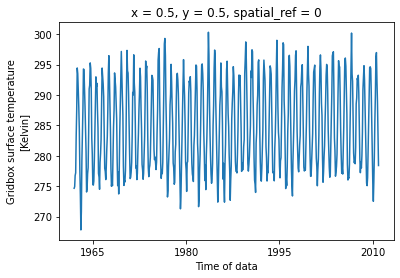

In [126]:
xr[:, :, :].plot()

This plot shows the distribution of temperature between the year 1961 upto the year 2010 in baresoil land cover.  

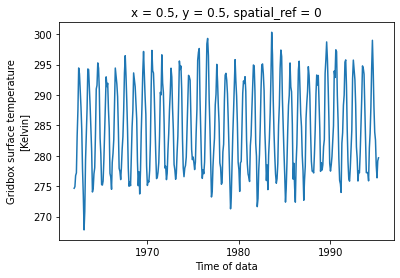

In [127]:
xr[:400, :15, :15].plot()

(array([  2.,  16.,  93., 111.,  68.,  56.,  76.,  79.,  70.,  17.]),
 array([267.81564, 271.06625, 274.31686, 277.56747, 280.81808, 284.0687 ,
        287.3193 , 290.56992, 293.82053, 297.07114, 300.32175],
       dtype=float32),
 <a list of 10 Patch objects>)

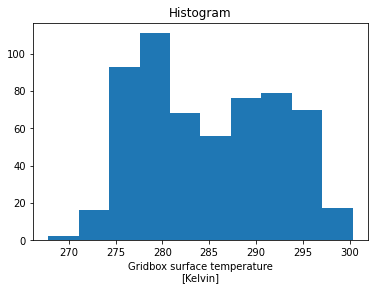

In [128]:
xr = xr.where(xr != xr.attrs['missing_value'])
xr[:, :, :].plot.hist()

(array([  2.,  16.,  93., 111.,  68.,  56.,  76.,  79.,  70.,  17.]),
 array([267.81564, 271.06625, 274.31686, 277.56747, 280.81808, 284.0687 ,
        287.3193 , 290.56992, 293.82053, 297.07114, 300.32175],
       dtype=float32),
 <a list of 10 Patch objects>)

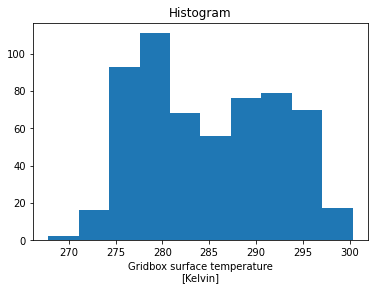

In [129]:
xr = xr.where(xr != xr.attrs['missing_value'])
xr[:, :10, :10].plot.hist()

##Broadleaf

In [130]:
xr1=rioxarray.open_rasterio(broadleaf)
xr1.attrs['units']='Kelvin'

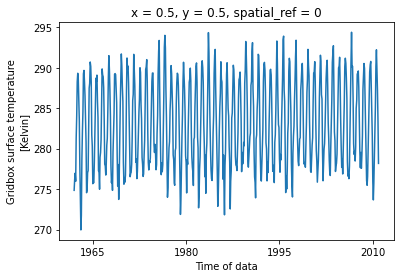

In [131]:
xr1[:, :, :].plot()

(array([  4.,  16.,  77., 107.,  80.,  59.,  60.,  97.,  69.,  19.]),
 array([269.9574 , 272.4003 , 274.84317, 277.28607, 279.72894, 282.17184,
        284.61475, 287.05762, 289.50052, 291.9434 , 294.3863 ],
       dtype=float32),
 <a list of 10 Patch objects>)

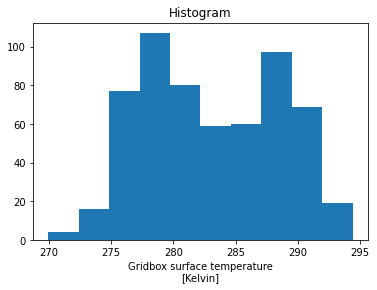

In [132]:
xr1 = xr1.where(xr1 != xr1.attrs['missing_value'])
xr1[:, :, :].plot.hist()

(array([  4.,  16.,  77., 107.,  80.,  59.,  60.,  97.,  69.,  19.]),
 array([269.9574 , 272.4003 , 274.84317, 277.28607, 279.72894, 282.17184,
        284.61475, 287.05762, 289.50052, 291.9434 , 294.3863 ],
       dtype=float32),
 <a list of 10 Patch objects>)

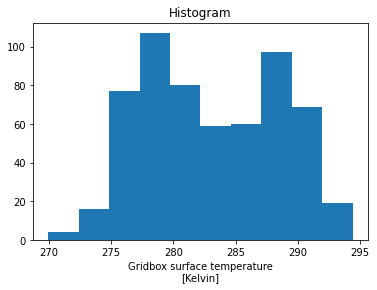

In [133]:
xr1 = xr1.where(xr1 != xr1.attrs['missing_value'])
xr1[:, :10, :10].plot.hist()

In [134]:
# Simple statistics 
# Descriptive statistics with such as minimum , maximum, mean temperature, and the standard deviation of temperature.
# Defining a function for simple statistic
def simplestat(xr):
    print("The minimum temperature in is \n" +str(xr.min()))
    print("=====================================================================")
    print("The maximum temperature land cover is \n" +str(xr.max()))
    print("=====================================================================")
    print("The mean temperature in  land cover is \n" +str(xr.mean()))
    print("=====================================================================")
    print("The standard deviation of temperature in  land cover is \n" +str(xr.std()))


In [135]:
#Calling our function to show simple statistics for baresoil land cover 
simplestat(xr)

The minimum temperature in is 
<xarray.DataArray 'tstar_gb' ()>
array(267.81564331)
Coordinates:
    spatial_ref  int64 0
The maximum temperature land cover is 
<xarray.DataArray 'tstar_gb' ()>
array(300.32174683)
Coordinates:
    spatial_ref  int64 0
The mean temperature in  land cover is 
<xarray.DataArray 'tstar_gb' ()>
array(284.953, dtype=float32)
Coordinates:
    spatial_ref  int64 0
The standard deviation of temperature in  land cover is 
<xarray.DataArray 'tstar_gb' ()>
array(7.19126987)
Coordinates:
    spatial_ref  int64 0


In [136]:
#showing simple statistic for broadleaf landcover temperature.
simplestat(xr1)

The minimum temperature in is 
<xarray.DataArray 'tstar_gb' ()>
array(269.95739746)
Coordinates:
    spatial_ref  int64 0
The maximum temperature land cover is 
<xarray.DataArray 'tstar_gb' ()>
array(294.3862915)
Coordinates:
    spatial_ref  int64 0
The mean temperature in  land cover is 
<xarray.DataArray 'tstar_gb' ()>
array(283.14246, dtype=float32)
Coordinates:
    spatial_ref  int64 0
The standard deviation of temperature in  land cover is 
<xarray.DataArray 'tstar_gb' ()>
array(5.39350653)
Coordinates:
    spatial_ref  int64 0


##Task 2

Write a set of functions that will calculate and compare the mean seasonal cycle of temperature for each land cover type (i.e., the average over the years of temperature for each calendar month).  Describe your results using plots and brief text.   
Present your results in the form of a short description and interpretation (no more than one page) plus no more than four plots.  You should also submit your code file for assessment. 

In [137]:
xr.mean()

<xarray.DataArray 'tstar_gb' ()>
array(284.953, dtype=float32)
Coordinates:
    spatial_ref  int64 0

To get the actual value we’ll need to multiple by the scale factor.

In [138]:
print(xr.attrs['scale_factor'])

1.0


In [139]:
#It will be the same since scale factor in baresoil data is 1,0 as seen above
xr.mean()* xr.attrs['scale_factor']

<xarray.DataArray 'tstar_gb' ()>
array(284.95300293)
Coordinates:
    spatial_ref  int64 0

##Calculating and Plotting Statistics

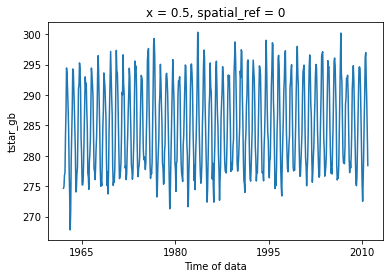

In [140]:
xr.mean(dim='y').plot()

Total annual temperature

(array([  2.,  16.,  93., 111.,  68.,  56.,  76.,  79.,  70.,  17.]),
 array([267.81564, 271.06625, 274.31686, 277.56747, 280.81808, 284.0687 ,
        287.3193 , 290.56992, 293.82053, 297.07114, 300.32175],
       dtype=float32),
 <a list of 10 Patch objects>)

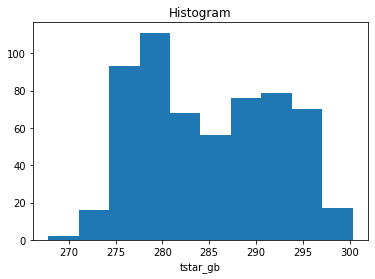

In [141]:
(xr.sum(dim='y') * xr.attrs['scale_factor']).plot.hist()